In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_train = pd.read_csv("DailyDelhiClimateTrain.csv")
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [6]:
df_test = pd.read_csv("DailyDelhiClimateTest.csv")
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [10]:
df = pd.concat([df_train, df_test], ignore_index=True)
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1571,2017-04-20,34.500000,27.500000,5.562500,998.625000
1572,2017-04-21,34.250000,39.375000,6.962500,999.875000
1573,2017-04-22,32.900000,40.900000,8.890000,1001.600000
1574,2017-04-23,32.875000,27.500000,9.962500,1002.125000


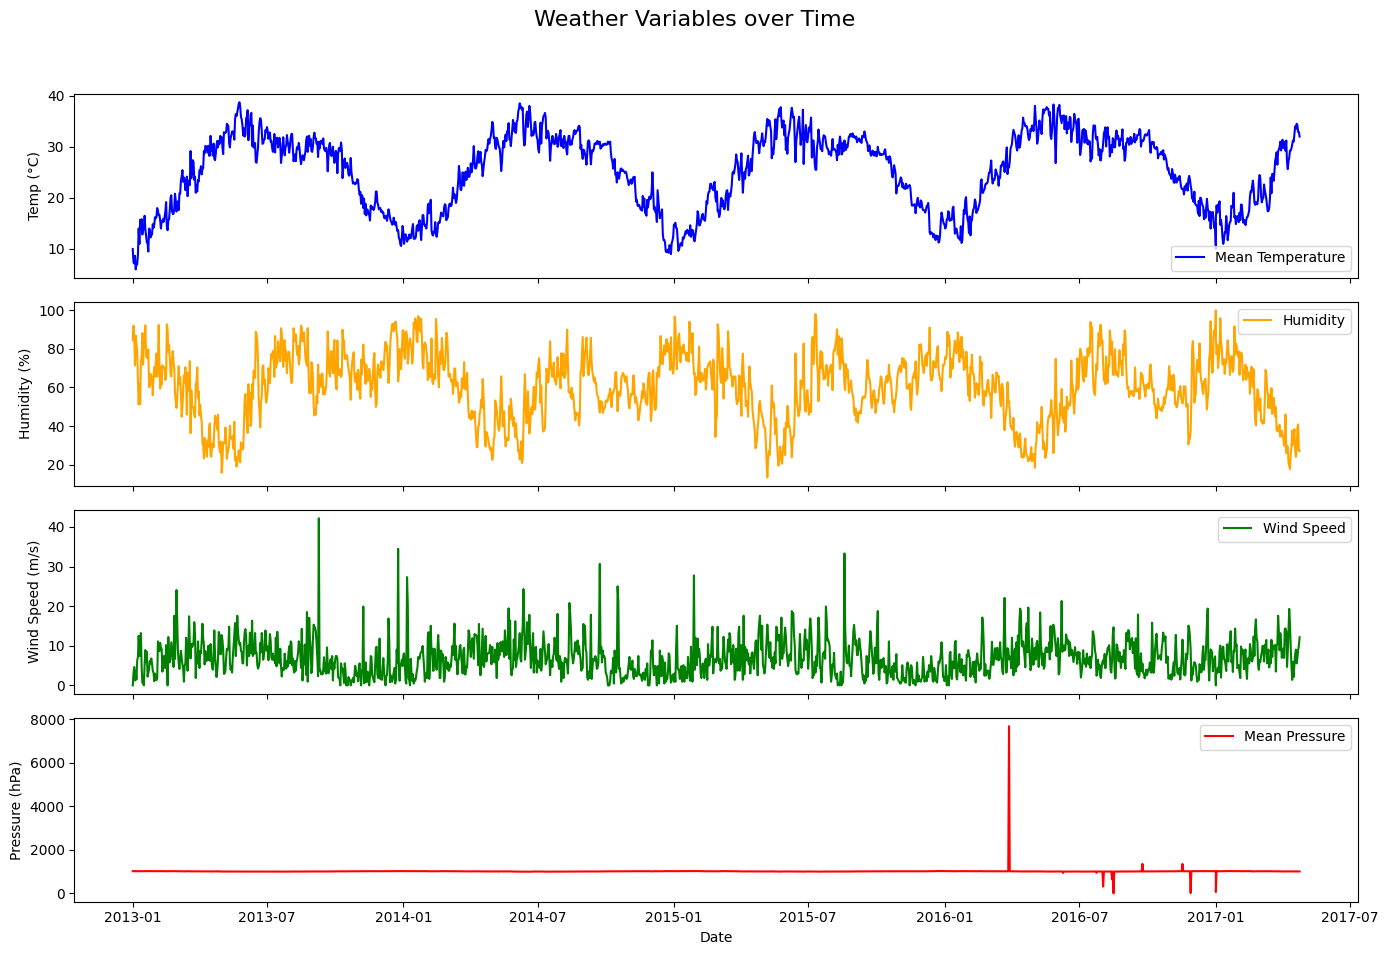

In [14]:
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Plot each variable
axs[0].plot(df['date'], df['meantemp'], color='blue', label='Mean Temperature')
axs[0].set_ylabel('Temp (°C)')
axs[0].legend()

axs[1].plot(df['date'], df['humidity'], color='orange', label='Humidity')
axs[1].set_ylabel('Humidity (%)')
axs[1].legend()

axs[2].plot(df['date'], df['wind_speed'], color='green', label='Wind Speed')
axs[2].set_ylabel('Wind Speed (m/s)')
axs[2].legend()

axs[3].plot(df['date'], df['meanpressure'], color='red', label='Mean Pressure')
axs[3].set_ylabel('Pressure (hPa)')
axs[3].set_xlabel('Date')
axs[3].legend()

plt.suptitle('Weather Variables over Time', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

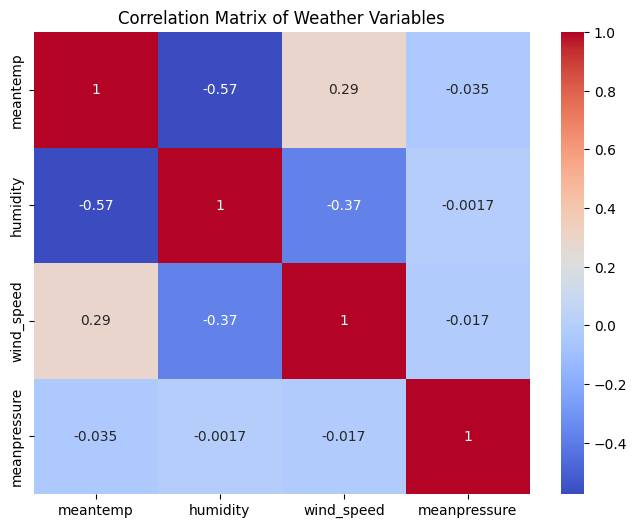

In [21]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Variables')
plt.show()

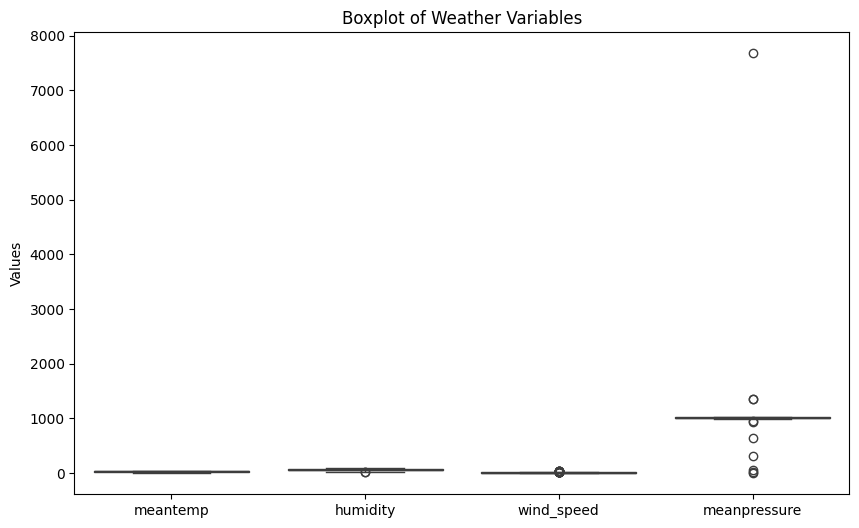

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
plt.title('Boxplot of Weather Variables')
plt.ylabel('Values')
plt.show()

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

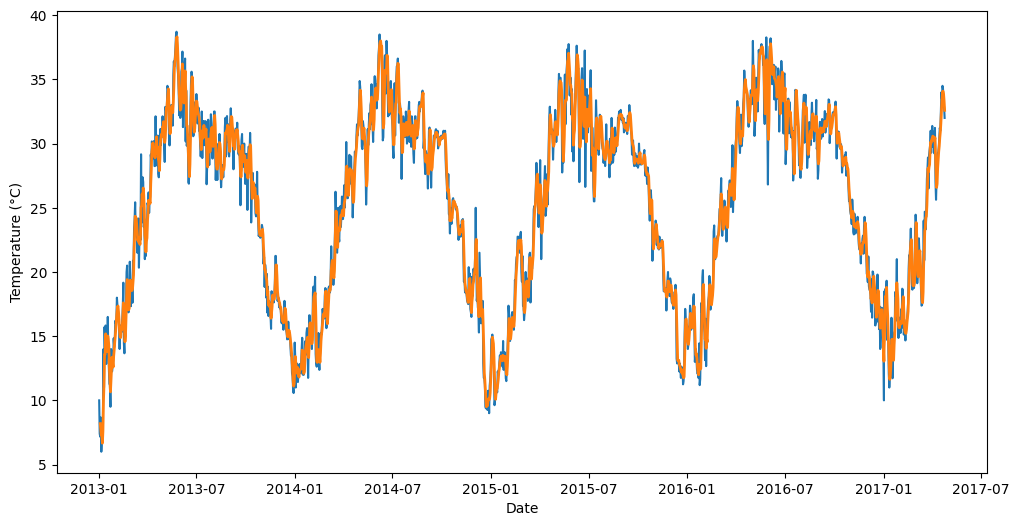

In [18]:
df.set_index('date', inplace=True)  

# Compute rolling mean  
df_rolling = df.rolling(window=3).mean()  

plt.figure(figsize=(12, 6))  
plt.plot(df.index, df['meantemp'], label='Mean Temp')  
plt.plot(df_rolling.index, df_rolling['meantemp'], label='Rolling Avg Temp', linewidth=2)  

plt.xlabel('Date')  
plt.ylabel('Temperature (°C)')  
plt.title

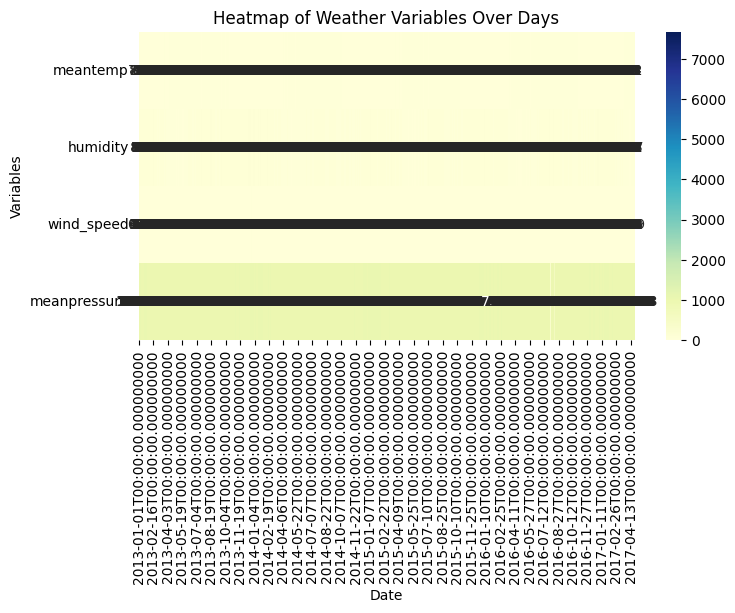

In [27]:
# If you've already set 'date' as index, just use df.index
heatmap_data = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data.T, annot=True, cmap='YlGnBu')
plt.xlabel('Date')
plt.ylabel('Variables')
plt.title('Heatmap of Weather Variables Over Days')
plt.show()

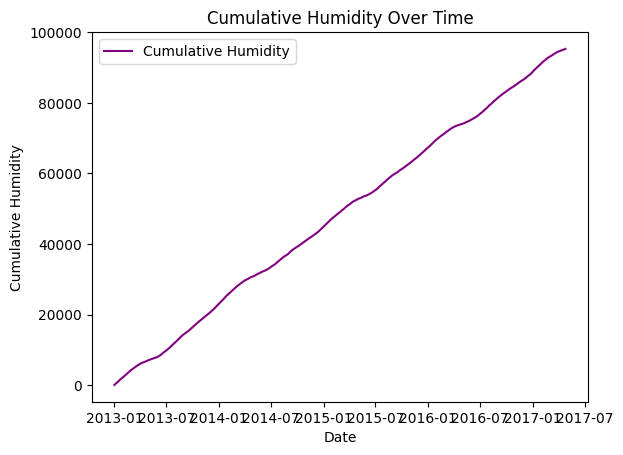

In [28]:
# Reset index, so 'date' becomes a column again
df.reset_index(inplace=True)

plt.plot(df['date'], df['humidity'].cumsum(), label='Cumulative Humidity', color='purple')
plt.xlabel('Date')
plt.ylabel('Cumulative Humidity')
plt.title('Cumulative Humidity Over Time')
plt.legend()
plt.show()

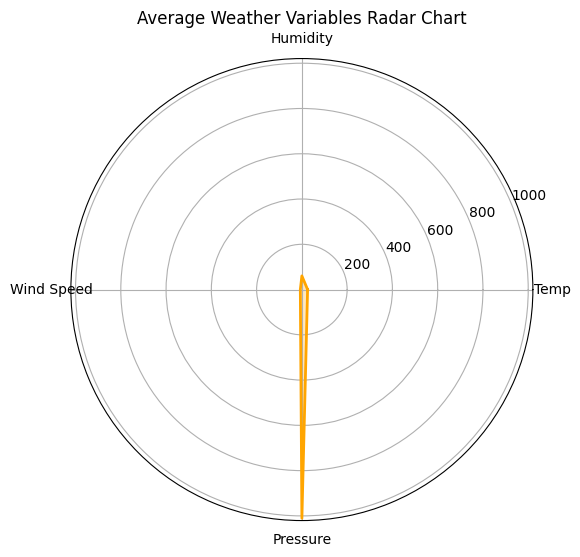

In [25]:
import numpy as np

labels=np.array(['Temp', 'Humidity', 'Wind Speed', 'Pressure'])
stats=np.array([
    df['meantemp'].mean(),
    df['humidity'].mean(),
    df['wind_speed'].mean(),
    df['meanpressure'].mean()
])

# Number of variables
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repeat the first value to close the circle
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, stats, color='orange', linewidth=2)
ax.fill(angles, stats, color='orange', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(0, max(stats) + 10)

plt.title("Average Weather Variables Radar Chart")
plt.show()

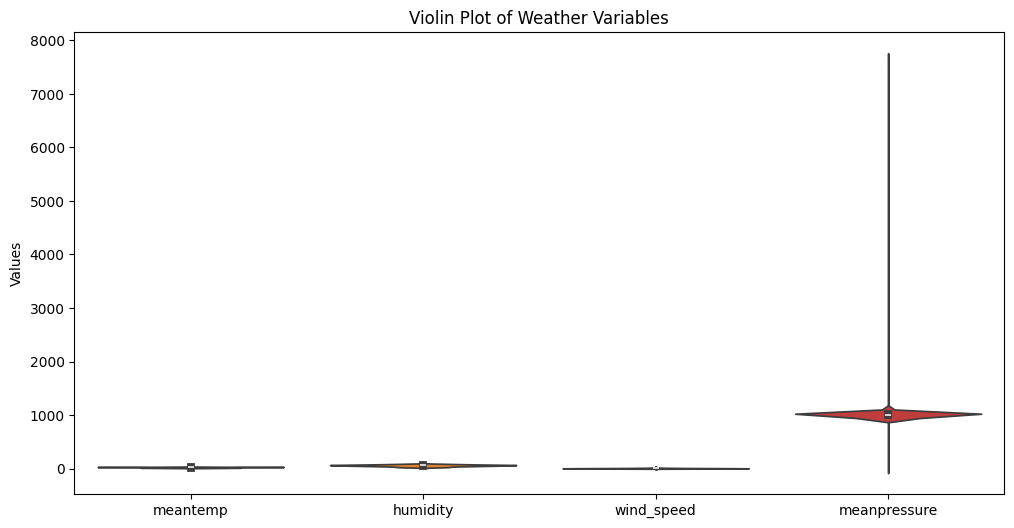

In [26]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
plt.title('Violin Plot of Weather Variables')
plt.ylabel('Values')
plt.show()

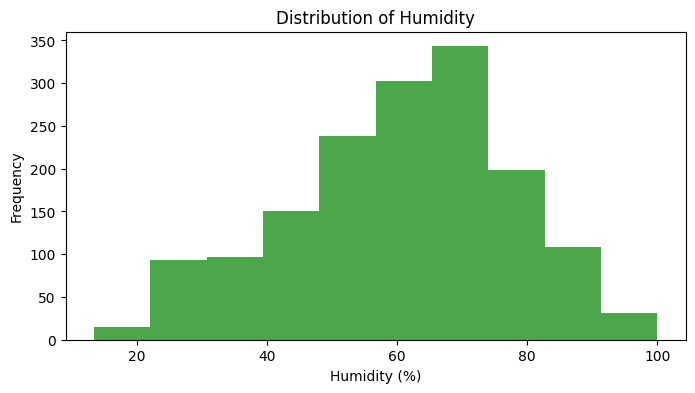

In [29]:
plt.figure(figsize=(8, 4))
plt.hist(df['humidity'], bins=10, color='green', alpha=0.7)
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity')
plt.show()

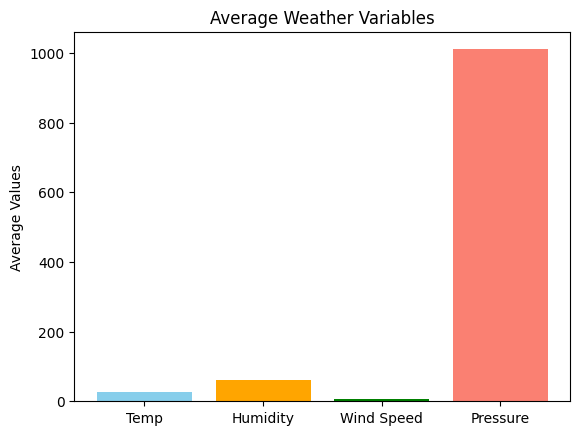

In [30]:
import numpy as np

means = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].mean()
labels = ['Temp', 'Humidity', 'Wind Speed', 'Pressure']

plt.bar(labels, means, color=['skyblue', 'orange', 'green', 'salmon'])
plt.ylabel('Average Values')
plt.title('Average Weather Variables')
plt.show()

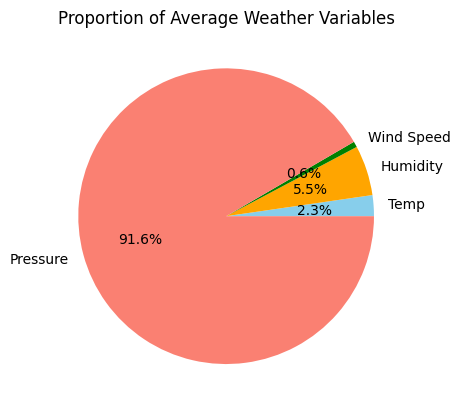

In [31]:
plt.pie(means, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'salmon'])
plt.title('Proportion of Average Weather Variables')
plt.show()

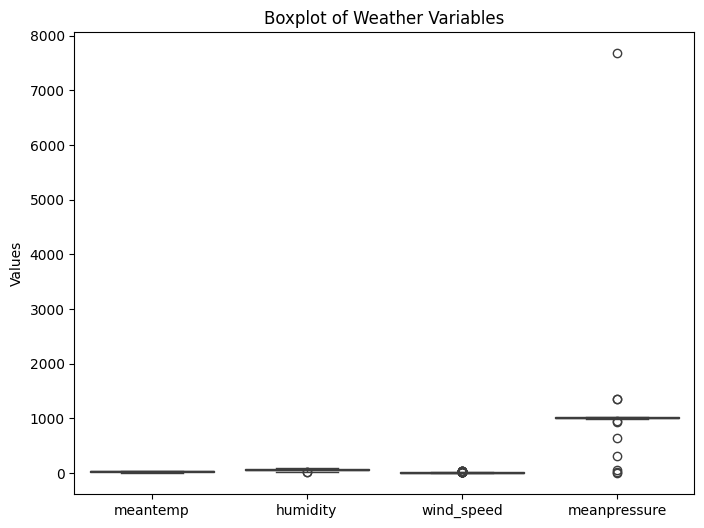

In [32]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
plt.title('Boxplot of Weather Variables')
plt.ylabel('Values')
plt.show()

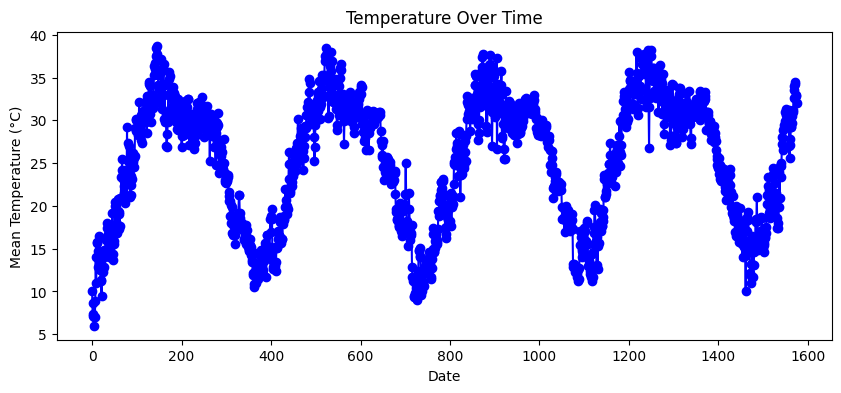

In [33]:
import matplotlib.pyplot as plt

# Plot temperature over time
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['meantemp'], color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Temperature Over Time')
plt.show()

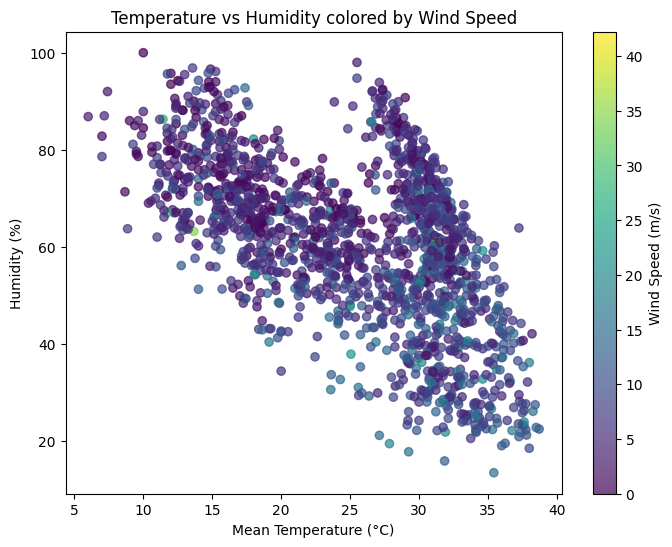

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(df['meantemp'], df['humidity'], c=df['wind_speed'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity colored by Wind Speed')
plt.show()

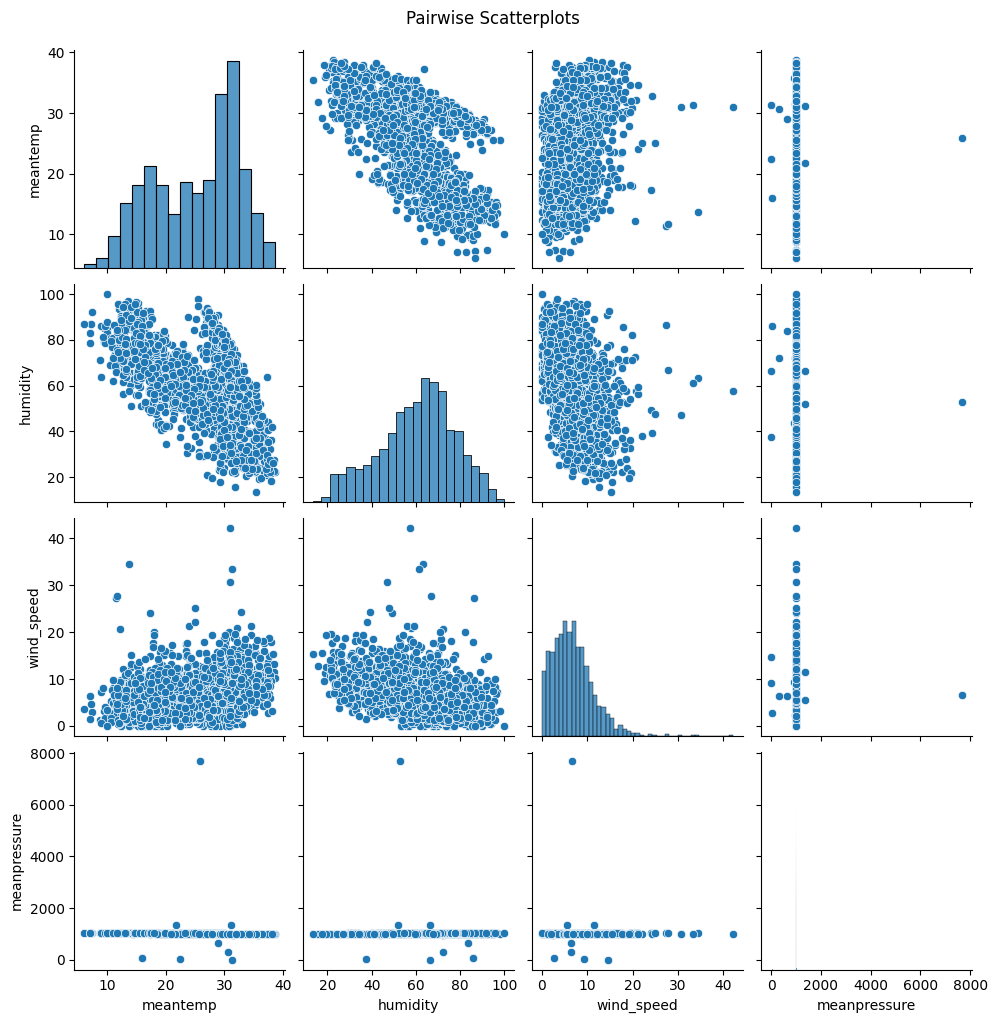

In [35]:
import seaborn as sns

sns.pairplot(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
plt.suptitle('Pairwise Scatterplots', y=1.02)
plt.show()

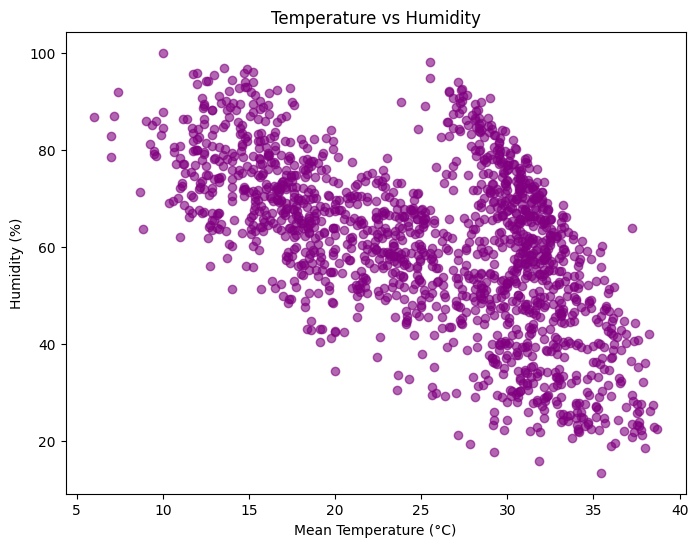

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['meantemp'], df['humidity'], color='purple', alpha=0.6)
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity')
plt.show()